## 序列二次方规划

In [1]:
import numpy as np

In [28]:
def seq_quad_program(f, g, h, x0, f_grad, f_hess, g_grad, h_grad, tol=1e-50, num_epochs=100):
    x = np.zeros((num_epochs, 2))
    x[0] = x0.ravel()
    x_star = []
    
    for k in range(num_epochs-1):
        A = np.block([[f_hess(x[k]), g_grad(x[k]).T], [g_grad(x[k]), 0]])
        b = np.block([-f_grad(x[k]), -g(x[k])])
        x_ = np.linalg.solve(A, b.T)
        d = x_[:2, :]
        lamb = x_[2,:]
        L = f_hess(x[k]).dot(d) + f_grad(x[k]).T + lamb * g_grad(x[k]).T
                
        x[k+1] = x[k].reshape([1, -1]) + d.T

        if h(x[k]) + h_grad(x[k]).dot(d) >= 0:
            x_star.append(x[k+1])
    if len(x_star) == 0:
        print("Haven't found any minima")
        return
    return x_star

## 最小化$f(x,y)=-x^2y$
满足 $x^2+y^2=1$, $xy>0$

In [15]:
import ipyvolume.pylab as plt3d
import matplotlib.pyplot as plt

In [11]:
f = lambda X: -X[0]**2 * X[1]
g = lambda X: X[0]**2 + X[1]**2 - 1
h = lambda X: X[0] * X[1]

In [13]:
xn = np.linspace(-3, 3, 50)
yn = np.linspace(-3, 3, 50)
xxn, yyn = np.meshgrid(xn, yn)
fn = f([xxn, yyn])
hn = h([xxn, yyn])
gn = g([xxn, yyn])

plt3d.figure(width=1000, height=500)
plt3d.plot_surface(xxn, fn, yyn, color='blue')
plt3d.plot_wireframe(xxn, gn, yyn, color="yellow")
plt3d.plot_wireframe(xxn, hn, yyn, color="green")
plt3d.ylabel("z")
plt3d.zlabel("y")
plt3d.show()

E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
E:\a-soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


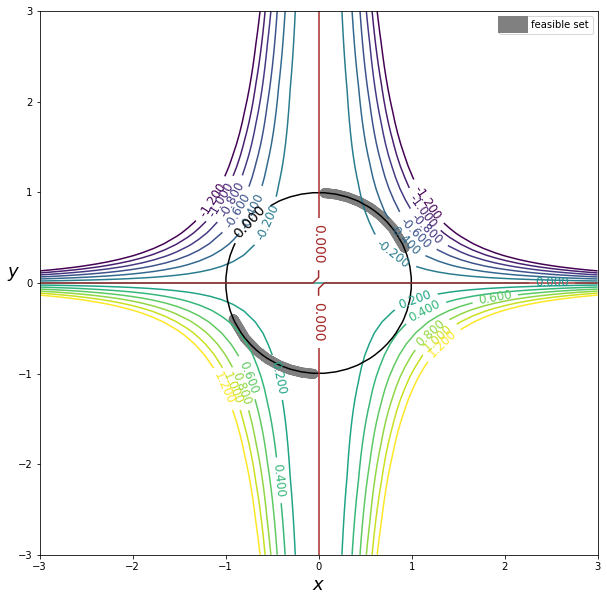

In [16]:
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(xxn, yyn, fn, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
plt.clabel(cs, fontsize=12)
cs0 = ax.contour(xxn, yyn, gn, levels=0, colors='black')
ax.clabel(cs0, fontsize=14)
cs1 = ax.contour(xxn, yyn, hn, levels=0, colors='brown')
ax.clabel(cs1, fontsize=14)
plt.fill_between(xn[xn > 0], np.sqrt(1 - xn[xn > 0]**2), 
                 np.sqrt(1 - xn[xn > 0]**2), linewidth=10,  
                 color='gray')
plt.fill_between(xn[xn < 0], -np.sqrt(1 - xn[xn < 0]**2), 
                 -np.sqrt(1 - xn[xn < 0]**2), linewidth=10,  
                 color='gray', label="feasible set")

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
plt.show() 

### 使用`Sympy`

In [21]:
import sympy
sympy.init_printing()

x, y = sympy.symbols("x, y")
f_sym = -x**2 * y
g_sym = x**2 + y**2 -1
h_sym = x * y

In [22]:
f_mat = sympy.Matrix([f_sym])
g_mat = sympy.Matrix([g_sym])
h_mat = sympy.Matrix([h_sym])
f_grad_sym = f_mat.jacobian([x, y])
g_grad_sym = g_mat.jacobian([x, y])
h_grad_sym = h_mat.jacobian([x, y])
f_hess_sym = f_grad_sym.jacobian([x, y])

f_lamb = sympy.lambdify((x, y), f_sym, 'numpy')
g_lamb = sympy.lambdify((x, y), g_sym, 'numpy')
h_lamb = sympy.lambdify((x, y), h_sym, 'numpy')
fgrad_lamb = sympy.lambdify((x, y), f_grad_sym, 'numpy')
ggrad_lamb = sympy.lambdify((x, y), g_grad_sym, 'numpy')
hgrad_lamb = sympy.lambdify((x, y), h_grad_sym, 'numpy')
fhess_lamb = sympy.lambdify((x, y), f_hess_sym, 'numpy')

In [23]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [24]:
f = func_XY_to_X_Y(f_lamb)
g = func_XY_to_X_Y(g_lamb)
h = func_XY_to_X_Y(h_lamb)
f_grad = func_XY_to_X_Y(fgrad_lamb)
g_grad = func_XY_to_X_Y(ggrad_lamb)
h_grad = func_XY_to_X_Y(hgrad_lamb)
f_hess = func_XY_to_X_Y(fhess_lamb)

#### Starting with initial value $x_0=(1.5, 1)$

In [30]:
mini = seq_quad_program(f, g, h, x0=np.array([1.5, 1]), 
                 f_grad=f_grad, f_hess=f_hess, 
                 g_grad=g_grad, h_grad=h_grad)
mini

[array([0.96428571, 0.67857143]),
 array([0.82671897, 0.58646702]),
 array([0.8174314 , 0.57619245]),
 array([0.8156448, 0.5785606]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.81564479, 0.57856059]),
 array([0.81735644, 0.57613994]),
 array([0.815644

In [31]:
final_root = mini[-1]
final_root

array([0.81735644, 0.57613994])

#### Starting with initial value $x_0=(-1.5, 1)$

In [32]:
mini1 = seq_quad_program(f, g, h, x0=np.array([-1.5, 1]), 
                 f_grad=f_grad, f_hess=f_hess, 
                 g_grad=g_grad, h_grad=h_grad)
mini1

Haven't found any minima


### Visualing the minimal value

In [34]:
plt3d.figure(width=1000, height=500)
plt3d.plot_surface(xxn, fn, yyn, color='blue')
plt3d.plot_wireframe(xxn, gn, yyn, color="yellow")
plt3d.plot_wireframe(xxn, hn, yyn, color="green")
plt3d.scatter(np.array([mini[-1][0]]), np.array([f(mini[-1])]), 
              np.array([mini[-1][1]]), size=5)
plt3d.ylabel("z")
plt3d.zlabel("y")
plt3d.show()

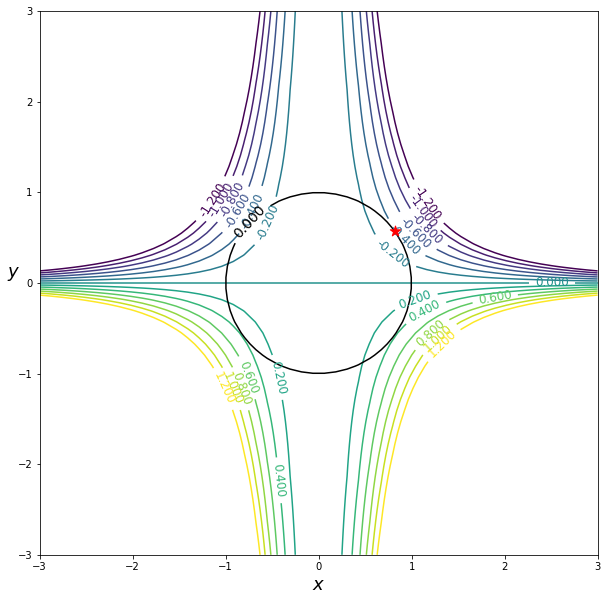

In [36]:
#G0 = X**2 + Y**2
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(xxn, yyn, fn, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
plt.clabel(cs, fontsize=12)
cs0 = ax.contour(xxn, yyn, gn, levels=0, colors='black')
ax.clabel(cs0, fontsize=14)
ax.scatter(mini[-1][0], mini[-1][1], marker="*", s=120, c="r", zorder=5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show()  

### 使用 `Scipy`

In [37]:
from scipy import optimize

constraints = [dict(type='eq', fun=g), dict(type='ineq', fun=h)]
optimize.minimize(f, (0, 0), method='SLSQP',
                  constraints=constraints)

     fun: -0.38490017960943446
     jac: array([-0.94279991, -0.66668296])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.81649658, 0.57735027])